In [2]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
from adjustText import adjust_text

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
# Getting specific job title from US only

df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()
df_DA_US

# Drop NaN values from column

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


# Take a look
df_DA_US['salary_year_avg'].sample(10)

27710      70000.00
635030     95000.00
405536    138615.00
380268     51862.75
132228    115000.00
163333     63000.00
190496     60000.00
741353     97086.50
774700     52500.00
301378     85000.00
Name: salary_year_avg, dtype: float64

<Axes: >

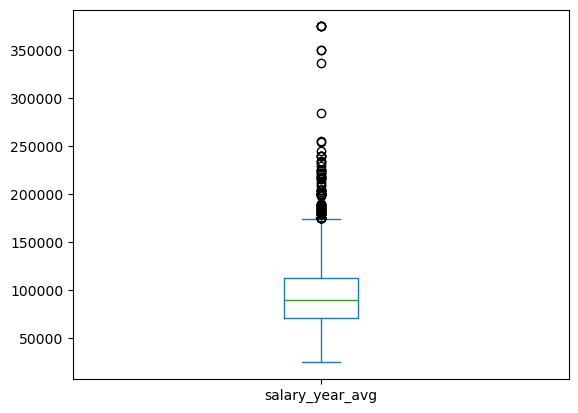

In [4]:
# Simple pandas box plot

df_DA_US['salary_year_avg'].plot(kind='box')

# Matplotlib version
# plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

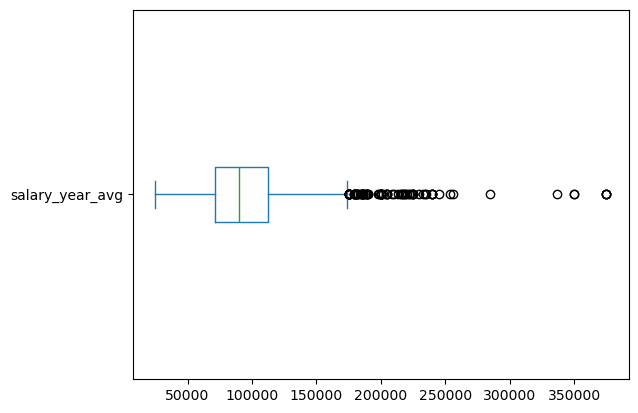

In [5]:
# Make it horizontal

df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

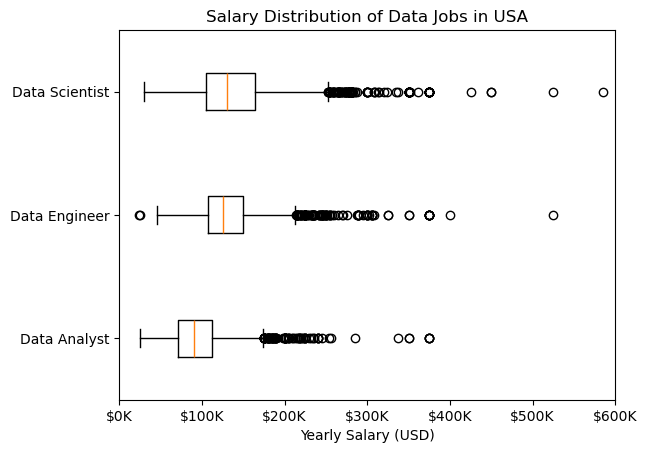

In [ ]:
### Hist + Boxplot to get a good idea of what's happening

    # Creating lists
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "United States")].copy()

#df_US # Checking above

# Drop NaN values
df_US = df_US.dropna(subset=['salary_year_avg'])


# Now need to get job_list
job_list = [df_US[df_US['job_title_short'] == job] ['salary_year_avg'] for job in job_titles]

job_list[0]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution of Data Jobs in USA')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca() # In order to change x axis to actual data values rather than decimal scale
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))
plt.xlim(0, 600000)
plt.show()

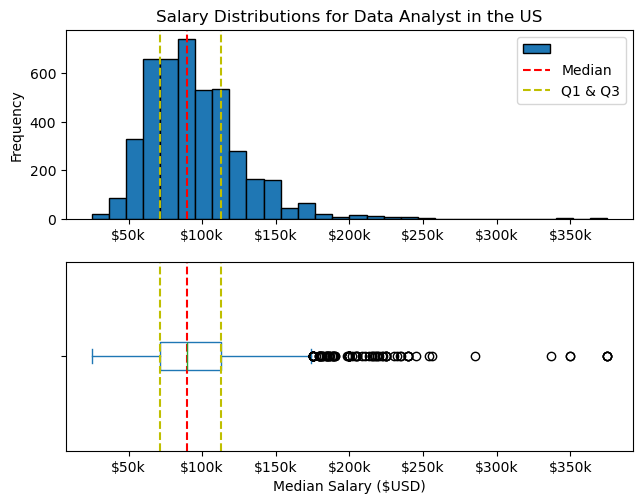

In [7]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()